<a href="https://colab.research.google.com/github/PepeParra0407/Clases-ML/blob/main/Tarea4_ML_Parra_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utiliza el archivo penguins.csv y realiza las siguientes actividades:
1. Realiza un análisis de los datos, utiliza al menos 3 tipos de gráficas como:
bigotes, matriz de correlación, etc. Escribe tus observaciones
2. Utiliza KNN o SVM para predecir la especie de un pingüino
3. Indica la precisión de tu modelo, traza la matriz de confusión de este ejercicio
Incluye el código en python y un archivo PDF que contenga las imágenes de las
gráficas

codigo 1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer # importa el 'ColumnTransformer' para aplicar el StandardScaler a las diferentes features
from sklearn.preprocessing import OneHotEncoder

#lectura del archivo cargado en Colab
archivo = pd.read_csv('penguins.csv')
codificador_de_etiquetas = preprocessing.LabelEncoder()
archivo['species']= codificador_de_etiquetas.fit_transform(archivo['species'])
print (archivo) #para visualizar la organizacion de los datos

#Clasificar las variables categoricas y numericas
features_categoricas = ['island', 'sex']
features_numericas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

preprocessor = ColumnTransformer(
    transformers=[
        ('numericas', StandardScaler(), features_numericas),  # Aplica el StandardScaler a features numericas
        ('categoricas', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), features_categoricas)  # Aplica un OneHotEncoder a features categoricas
    ])
#Para analisis estadistico de los datos
#La funcion 'describe' nos da el conteo total de datos, promedio, desviacion estandar, minimos, maximos y cuartiles :)
print (archivo.describe())

pipe = Pipeline([('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])

search_space = [{'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [3, 5, 7, 11],
                 'classifier__weights': ['uniform', 'distance'],
                 'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'classifier__metric': ['manhattan', 'euclidean', 'minkowski']},
                {'classifier': [SVC()],
                 'classifier__kernel': ['linear', 'rbf', 'poly'],
                 'classifier__C': [0.01, 0.1, 1, 10]}]

clf = GridSearchCV(pipe, search_space, cv=10)
clf = clf.fit(archivo[features_numericas + features_categoricas], archivo['species'])

print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)

        island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0    Torgersen            39.1           18.7                181         3750   
1    Torgersen            39.5           17.4                186         3800   
2    Torgersen            40.3           18.0                195         3250   
3    Torgersen            45.3           18.9                192         3255   
4    Torgersen            36.7           19.3                193         3450   
..         ...             ...            ...                ...          ...   
338     Biscoe            47.2           13.7                214         4925   
339     Biscoe            46.8           14.3                215         4850   
340     Biscoe            50.4           15.7                222         5750   
341     Biscoe            45.2           14.8                212         5200   
342     Biscoe            49.9           16.1                213         5400   

        sex  species  
0   

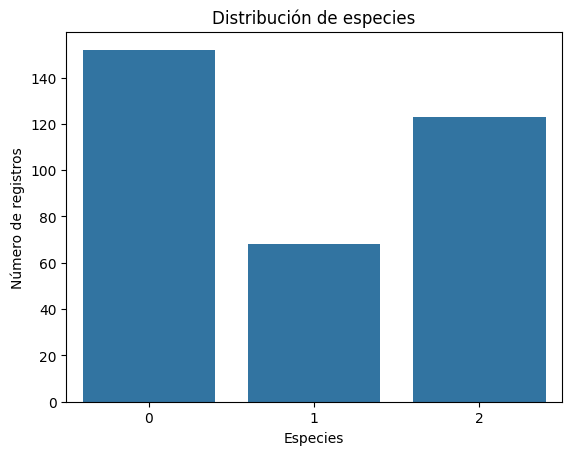

In [ ]:
# Para obtener el grafico de distribución de especies
sns.countplot(x='species', data=archivo), plt.title("Distribución de especies"), plt.xlabel("Especies"), plt.ylabel("Número de registros")
plt.show()

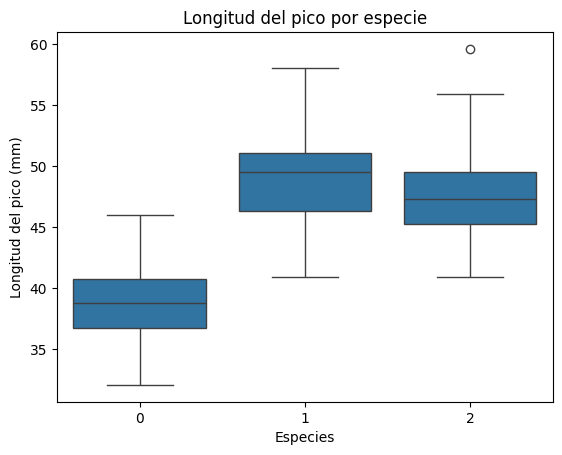

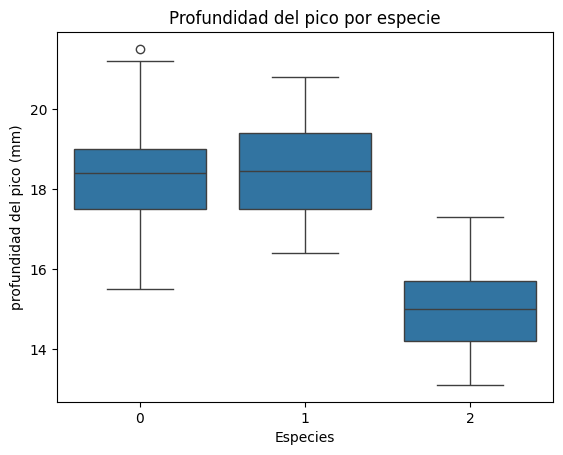

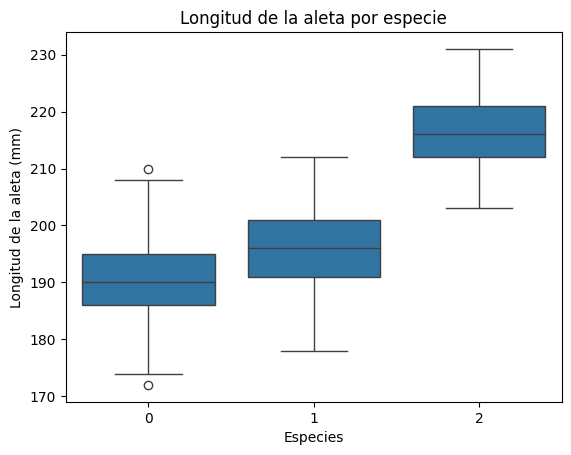

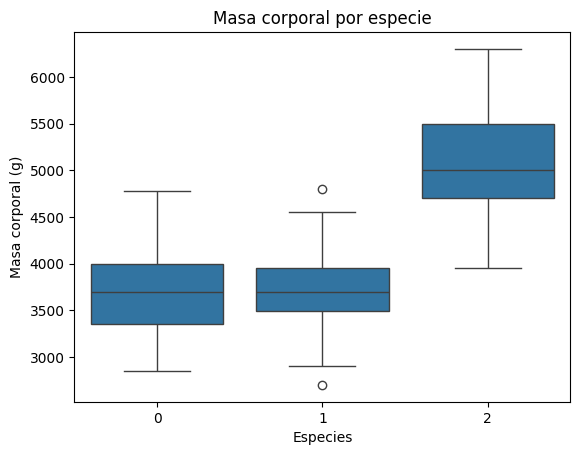

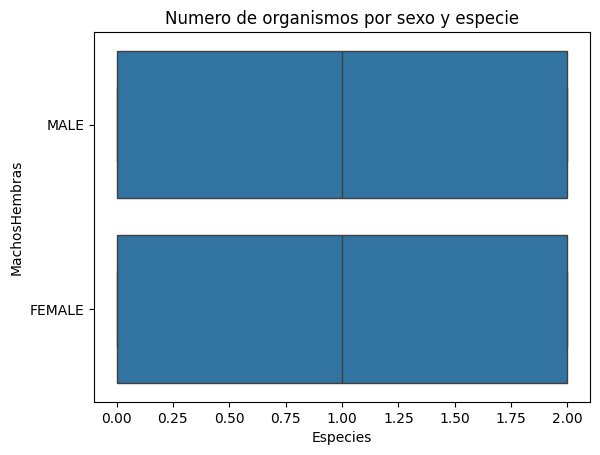

In [ ]:
#Gráficas
#Bigotes para longitud del pico (bill) por especie
sns.boxplot(x='species', y='bill_length_mm', data=archivo)
plt.title("Longitud del pico por especie"), plt.xlabel("Especies"), plt.ylabel("Longitud del pico (mm)")
plt.show()

sns.boxplot(x='species', y='bill_depth_mm', data=archivo)
plt.title("Profundidad del pico por especie"), plt.xlabel("Especies"), plt.ylabel("profundidad del pico (mm)")
plt.show()

sns.boxplot(x='species', y='flipper_length_mm', data=archivo)
plt.title("Longitud de la aleta por especie"), plt.xlabel("Especies"), plt.ylabel("Longitud de la aleta (mm)")
plt.show()

sns.boxplot(x='species', y='body_mass_g', data=archivo)
plt.title("Masa corporal por especie"), plt.xlabel("Especies"), plt.ylabel("Masa corporal (g)")
plt.show()


sns.boxplot(x='species', y='sex', data=archivo)
plt.title("Numero de organismos por sexo y especie"), plt.xlabel("Especies"), plt.ylabel("Machos" "Hembras")
plt.show()


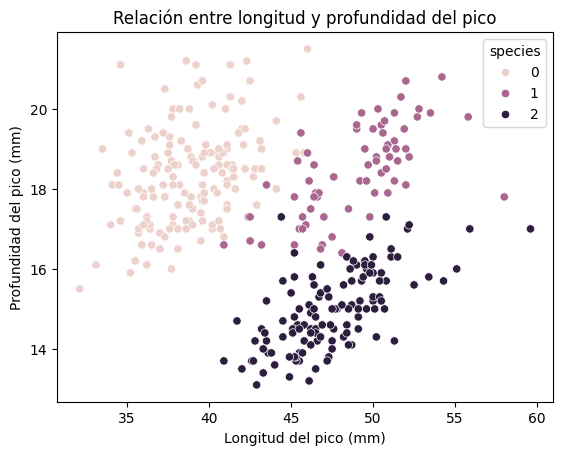

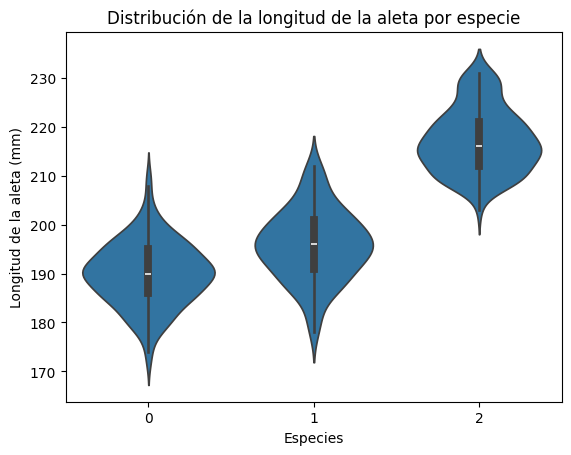

In [ ]:
#Diagrama de dispersion
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=archivo, hue='species')
plt.title("Relación entre longitud y profundidad del pico"), plt.xlabel("Longitud del pico (mm)"), plt.ylabel("Profundidad del pico (mm)")
plt.show()

#Diagrama de violin
sns.violinplot(x='species', y='flipper_length_mm', data=archivo)
plt.title("Distribución de la longitud de la aleta por especie"), plt.xlabel("Especies"), plt.ylabel("Longitud de la aleta (mm)")
plt.show()


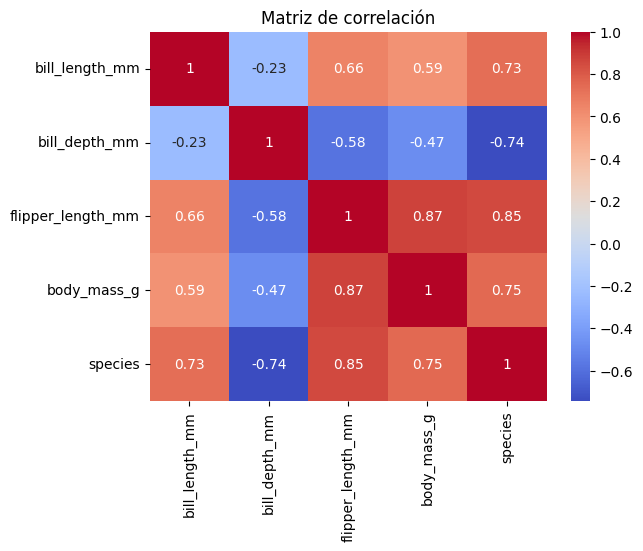

In [ ]:
#Matriz de correlación
features_numericas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']
matriz_de_correlacion = archivo[features_numericas].corr()
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

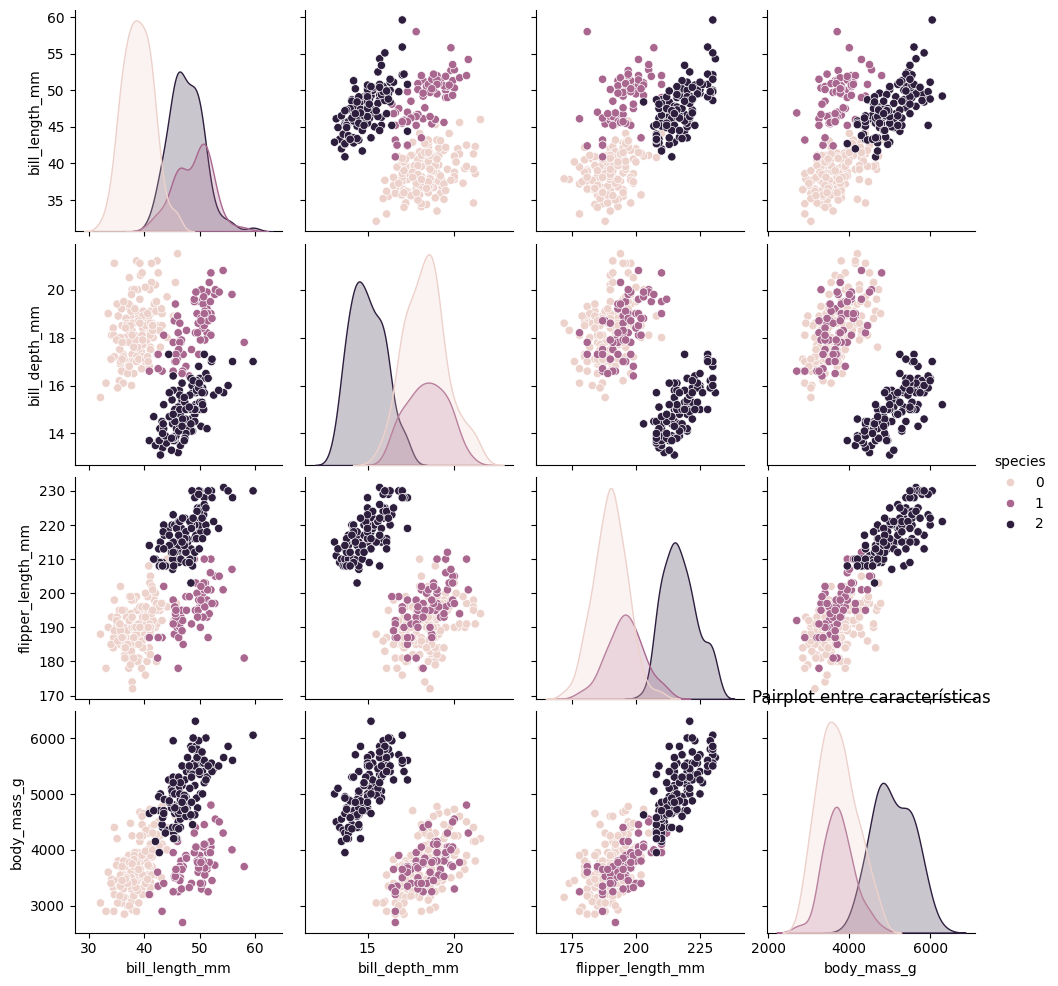

In [ ]:
#Pairplot para explorar relaciones entre características
sns.pairplot(archivo.dropna(), hue='species')
plt.title("Pairplot entre características")
plt.show()


<ipython-input-29-5aaf503bf5eb>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  archivo[column].fillna(archivo[column].mean(), inplace=True)


Precisión del modelo: 97.09%


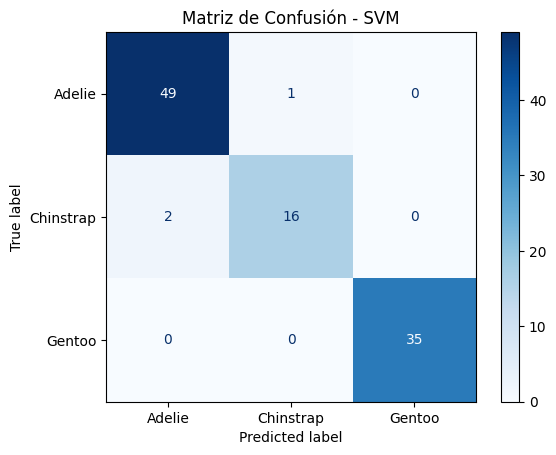

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

archivo = pd.read_csv('penguins.csv')

#Preprocesamiento
#Eliminar filas con valores nulos
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    archivo[column].fillna(archivo[column].mean(), inplace=True)

archivo.dropna(subset=['species'], inplace=True)

#Convertir las categorías de 'species' en variables numéricas
archivo['species'] = archivo['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

#Definir variables independientes (X) y dependiente (y)
X = archivo[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = archivo['species']

#Escalar datos
scaler = StandardScaler()

#Transformar el escalador con los datos
X_scaled = scaler.fit_transform(X)

#Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Entrenar el modelo con SVM
svm = SVC(kernel='linear')

# Entrenar el modelo
svm.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = svm.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - SVM")
plt.show()


In [ ]:
import pandas as pd

#Prediccion de un nuevo pinguino
medidas_np= [[45, 19.2, 200, 3865]]

#Scalar el nuevo dato
medidas_np_scaled = scaler.transform(medidas_np)

#Prediccion
y_pred = svm.predict(medidas_np_scaled)
if y_pred[0] == 0:
    print("El dato corresponde a la especie es Adelie")
elif y_pred[0] == 1:
    print("El dato corresponde a la especie Chinstrap")
else:
    print("El dato corresponde a la especie Gentoo")

print(y_pred)

El dato corresponde a la especie es Adelie
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Precisión del modelo KNN: 97.09%


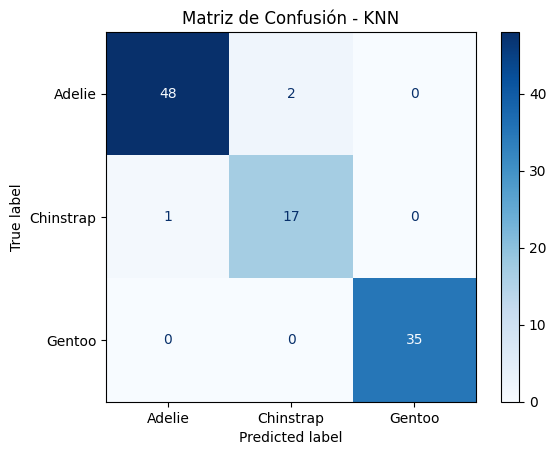

In [ ]:
#Entrenar el modelo con KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Realizamos predicciones
y_pred = knn.predict(X_test)

#Evaluar el modelo
#Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy * 100:.2f}%")

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - KNN")
plt.show()
